In [1]:
!rsync -rLptP callisto:/mnt/lustre/user/gnwong/images/highres/subrings/combined/*_3.npy data/

receiving incremental file list
dump_00003856_res40960_n000_3.npy
    209,715,625 100%    4.73MB/s    0:00:42 (xfr#1, to-chk=11/12)
dump_00003856_res40960_n001_3.npy
    209,715,625 100%    4.44MB/s    0:00:45 (xfr#2, to-chk=10/12)
dump_00003856_res40960_n002_3.npy
    209,715,625 100%    4.49MB/s    0:00:44 (xfr#3, to-chk=9/12)
dump_00010352_res40960_n000_3.npy
    209,715,625 100%    4.34MB/s    0:00:46 (xfr#4, to-chk=2/12)
dump_00010352_res40960_n001_3.npy
    209,715,625 100%    4.03MB/s    0:00:49 (xfr#5, to-chk=1/12)
dump_00010352_res40960_n002_3.npy
    209,715,625 100%    3.69MB/s    0:00:54 (xfr#6, to-chk=0/12)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ehtplot.color

In [3]:
fname = 'data/dump_00005712_res40960_n000_3.npy'

d = np.load(fname, allow_pickle=True).item()

In [6]:
def load_several(fnames, n0sup=1.):
    running_avg = None
    for fname in fnames:
        supfac = 1.
        if 'n000' in fname:
            supfac = n0sup
        d = np.load(fname, allow_pickle=True).item()
        if running_avg is None:
            running_avg = d['data'] * supfac
        else:
            running_avg += d['data'] * supfac
    return running_avg / len(fnames)

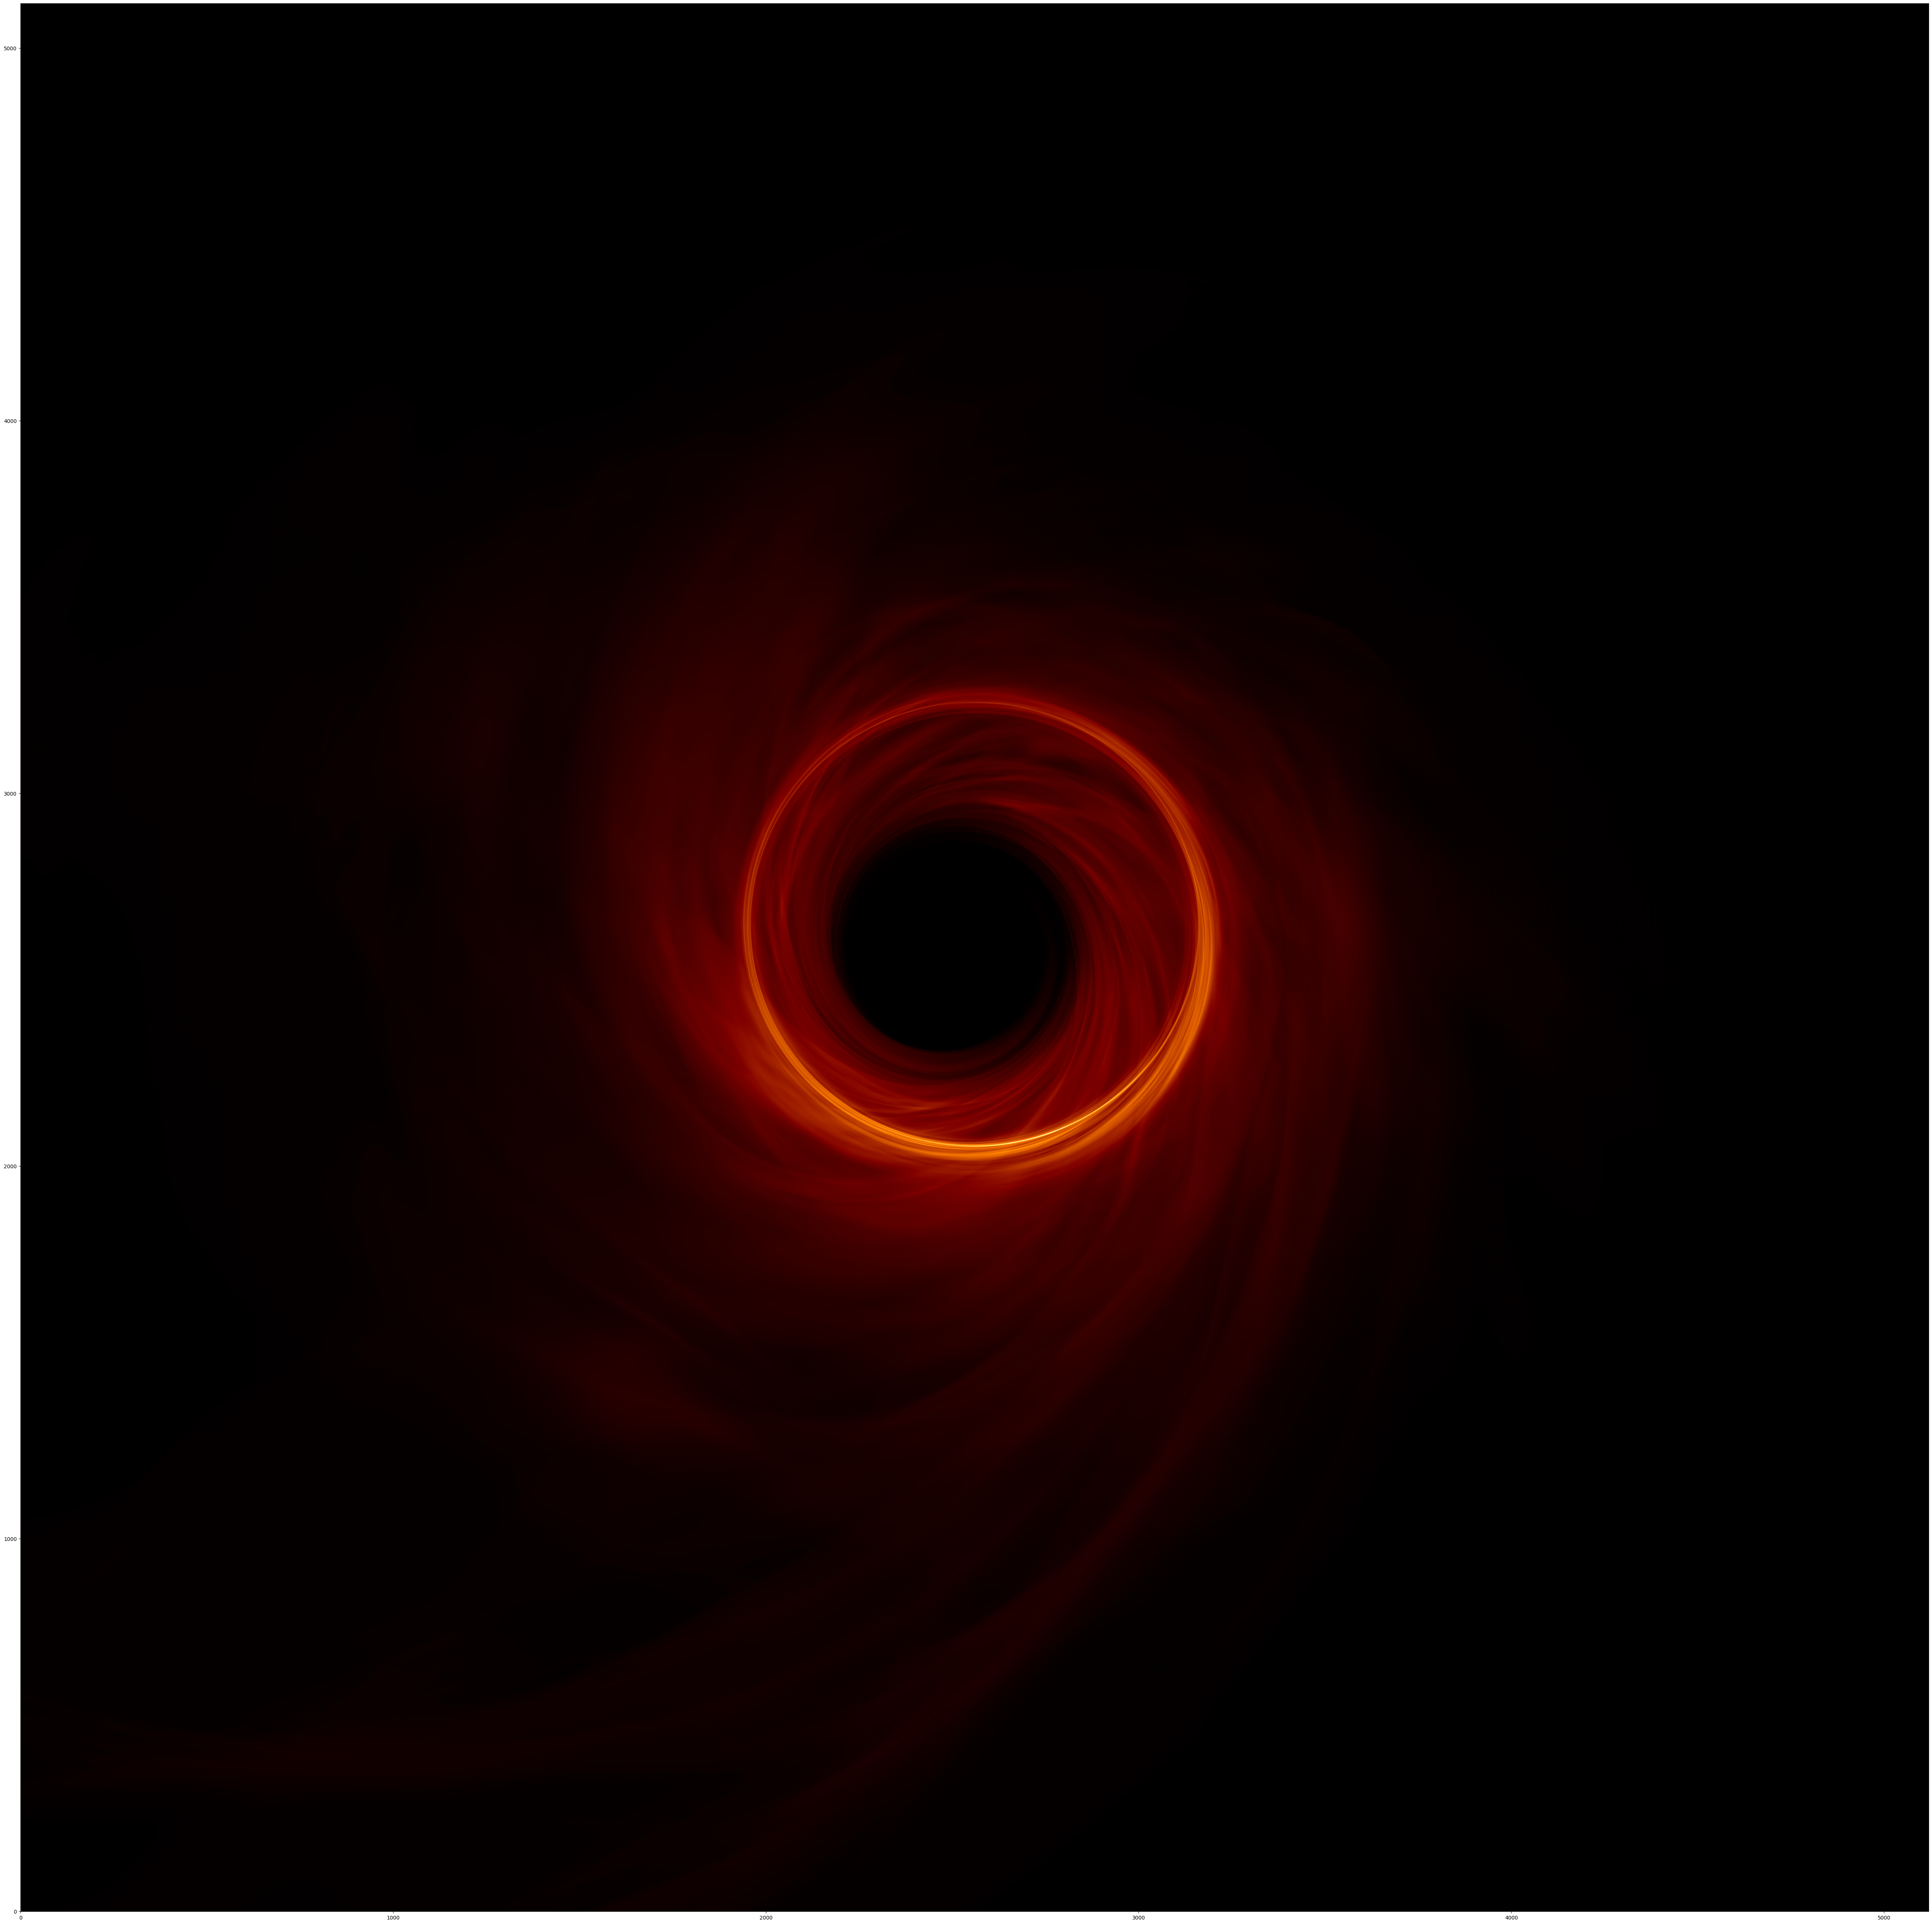

In [7]:
imdata = load_several(['data/dump_00005712_res40960_n000_3.npy', 
                       'data/dump_00008496_res40960_n000_3.npy',
                       'data/dump_00003856_res40960_n000_3.npy',
                       'data/dump_00010352_res40960_n000_3.npy',
                       'data/dump_00005712_res40960_n001_3.npy', 
                       'data/dump_00008496_res40960_n001_3.npy',
                       'data/dump_00003856_res40960_n001_3.npy',
                       'data/dump_00010352_res40960_n001_3.npy',
                       'data/dump_00005712_res40960_n002_3.npy', 
                       'data/dump_00008496_res40960_n002_3.npy',
                       'data/dump_00003856_res40960_n002_3.npy',
                       'data/dump_00010352_res40960_n002_3.npy'
                       ], n0sup=0.5)

fig = plt.figure(figsize=(51.2, 51.2), facecolor='w')

ax1 = plt.subplot(1, 1, 1)

pdata = np.power(imdata, 0.8) * 5.
pdata += np.power(imdata, 0.5) * 7.
pdata += np.power(imdata, 3) * 20
vmax = np.max(pdata) / np.sqrt(1.1)

ax1.imshow(pdata[:, ::-1], origin='lower', cmap='afmhot_u', vmin=0, vmax=vmax)
ax1.set_position([0, 0, 1, 1])

plt.savefig('im_nall.png', dpi=100)

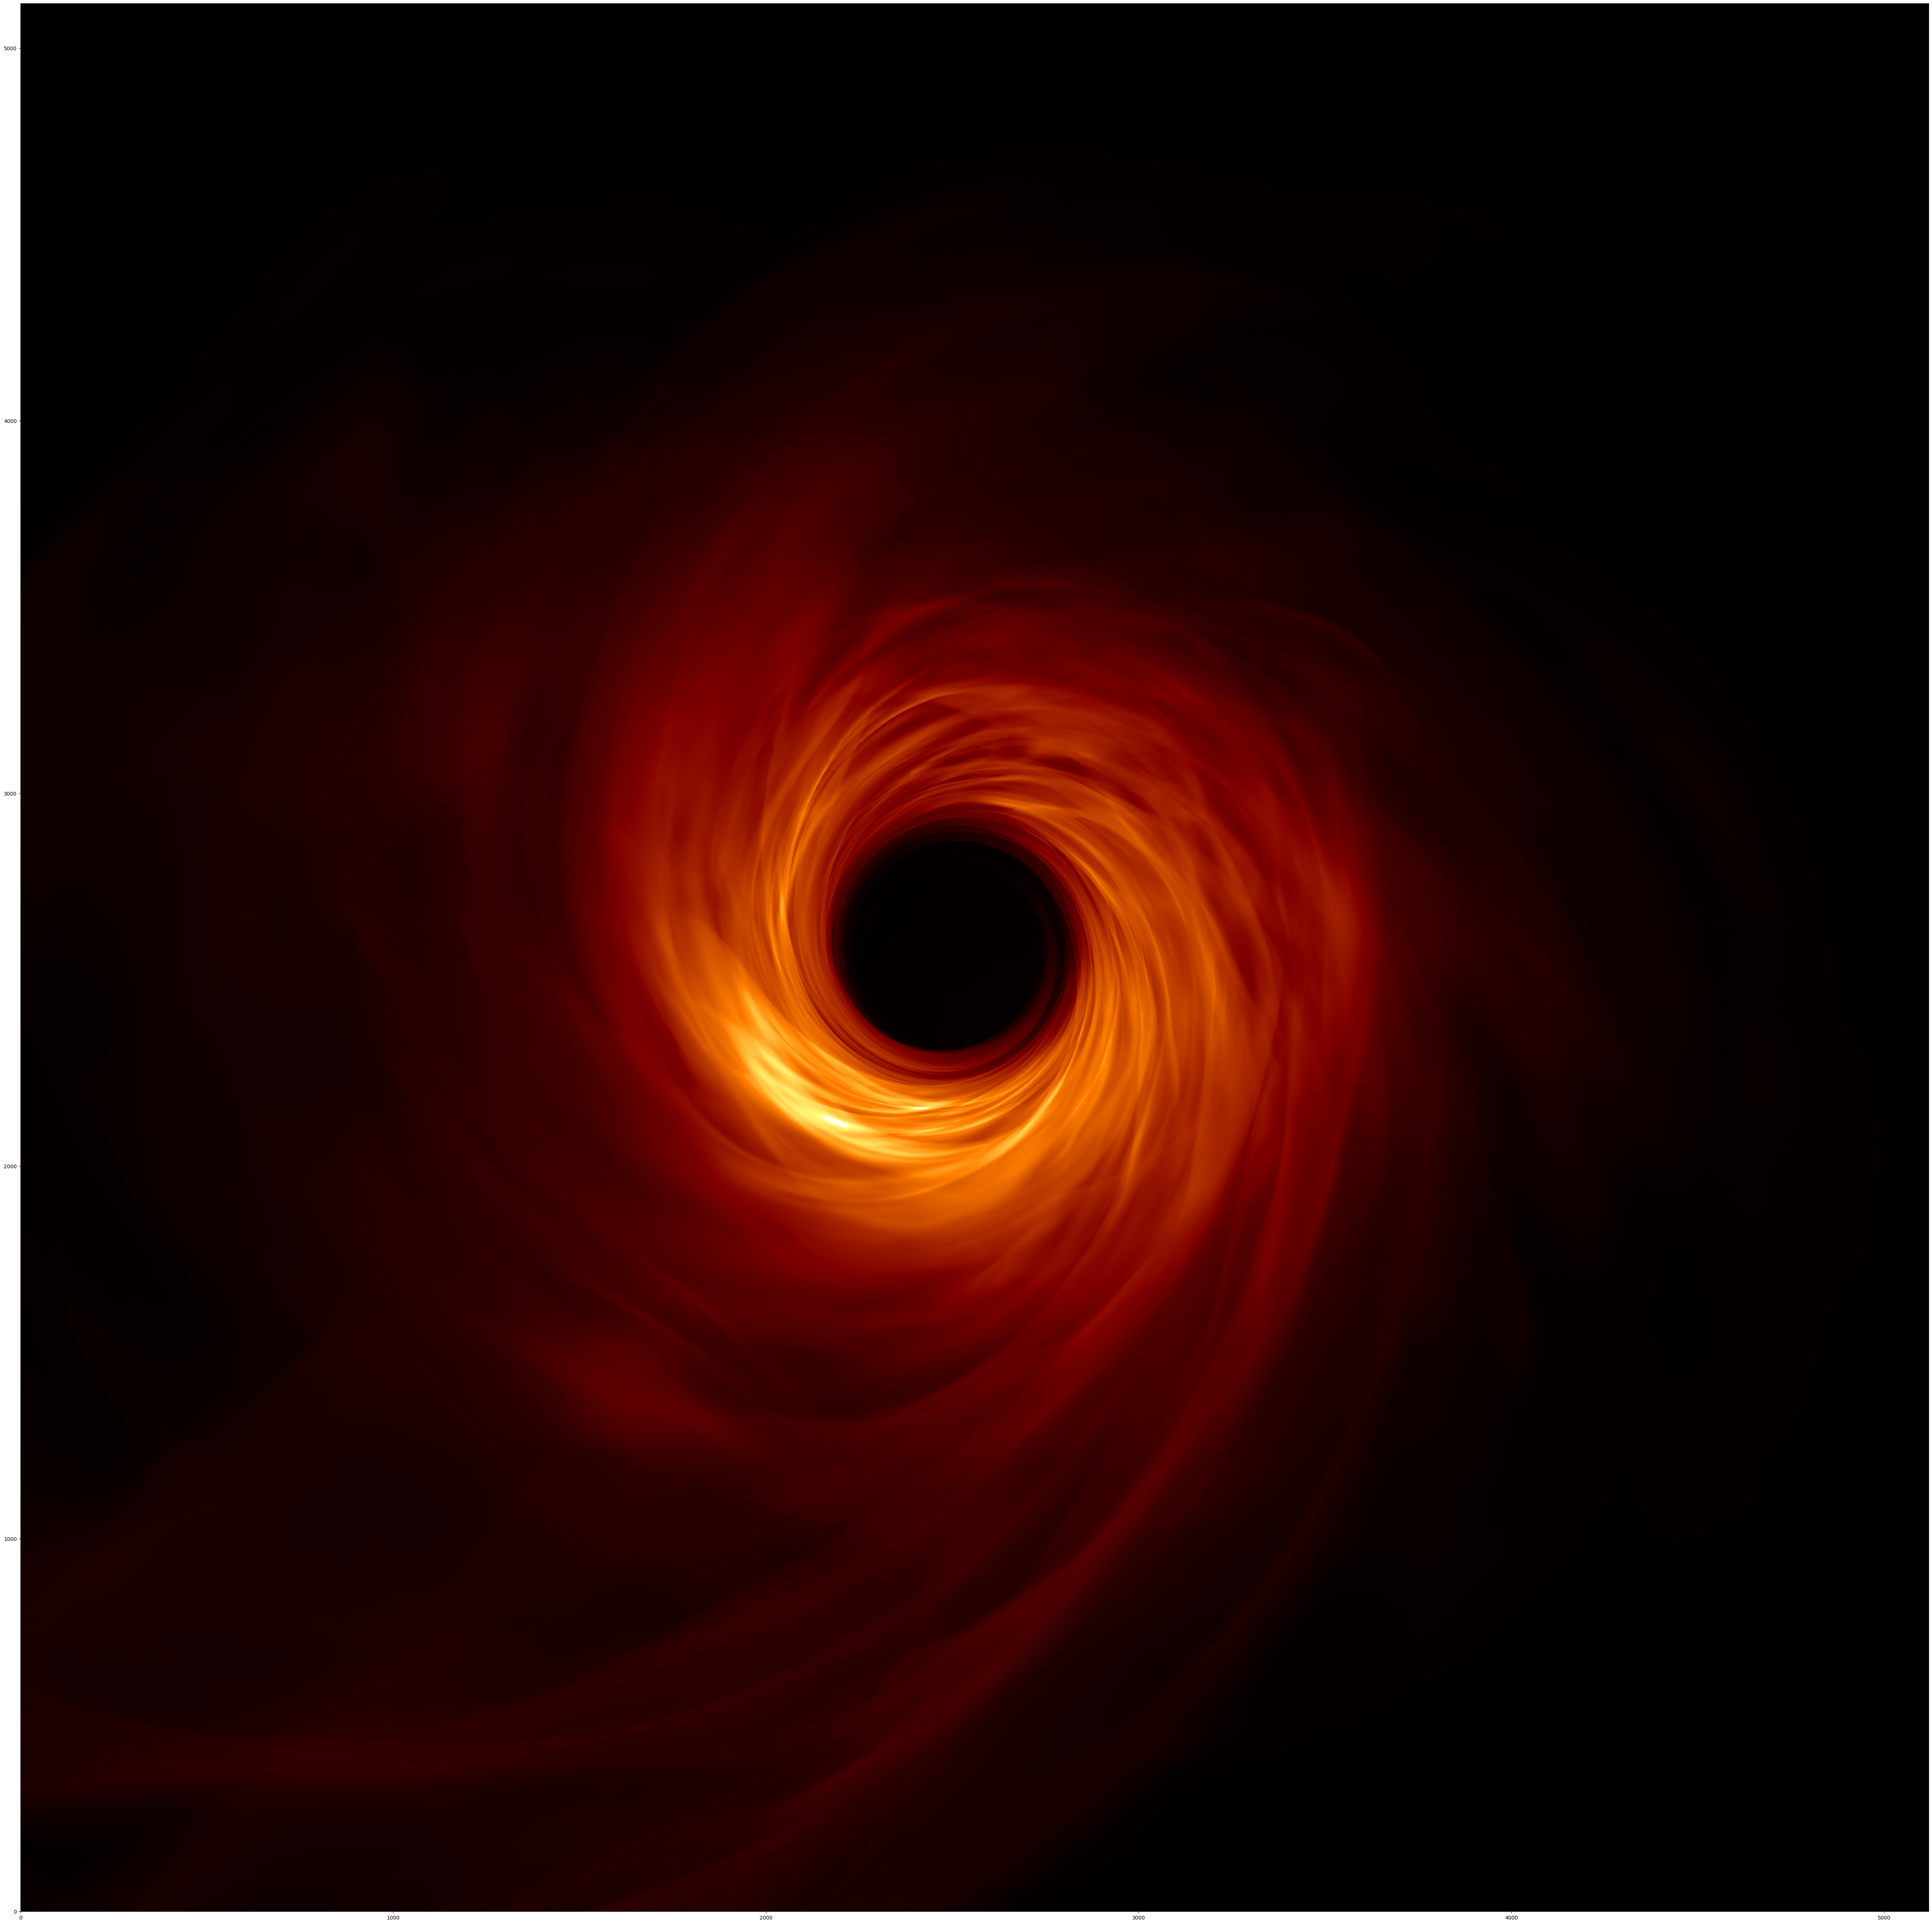

In [13]:
imdata = load_several(['data/dump_00005712_res40960_n000_3.npy', 
                       'data/dump_00008496_res40960_n000_3.npy',
                       'data/dump_00003856_res40960_n000_3.npy',
                       'data/dump_00010352_res40960_n000_3.npy'
                       ])

fig = plt.figure(figsize=(51.2, 51.2), facecolor='w')

ax1 = plt.subplot(1, 1, 1)

pdata = np.power(imdata, 0.8) * 5.
pdata += np.power(imdata, 0.5) * 7.
pdata += np.power(imdata, 3) * 20
vmax = np.max(pdata) / np.sqrt(1.1)

ax1.imshow(pdata[:, ::-1], origin='lower', cmap='afmhot_u', vmin=0, vmax=vmax)
ax1.set_position([0, 0, 1, 1])

plt.savefig('im_n000.png', dpi=100)

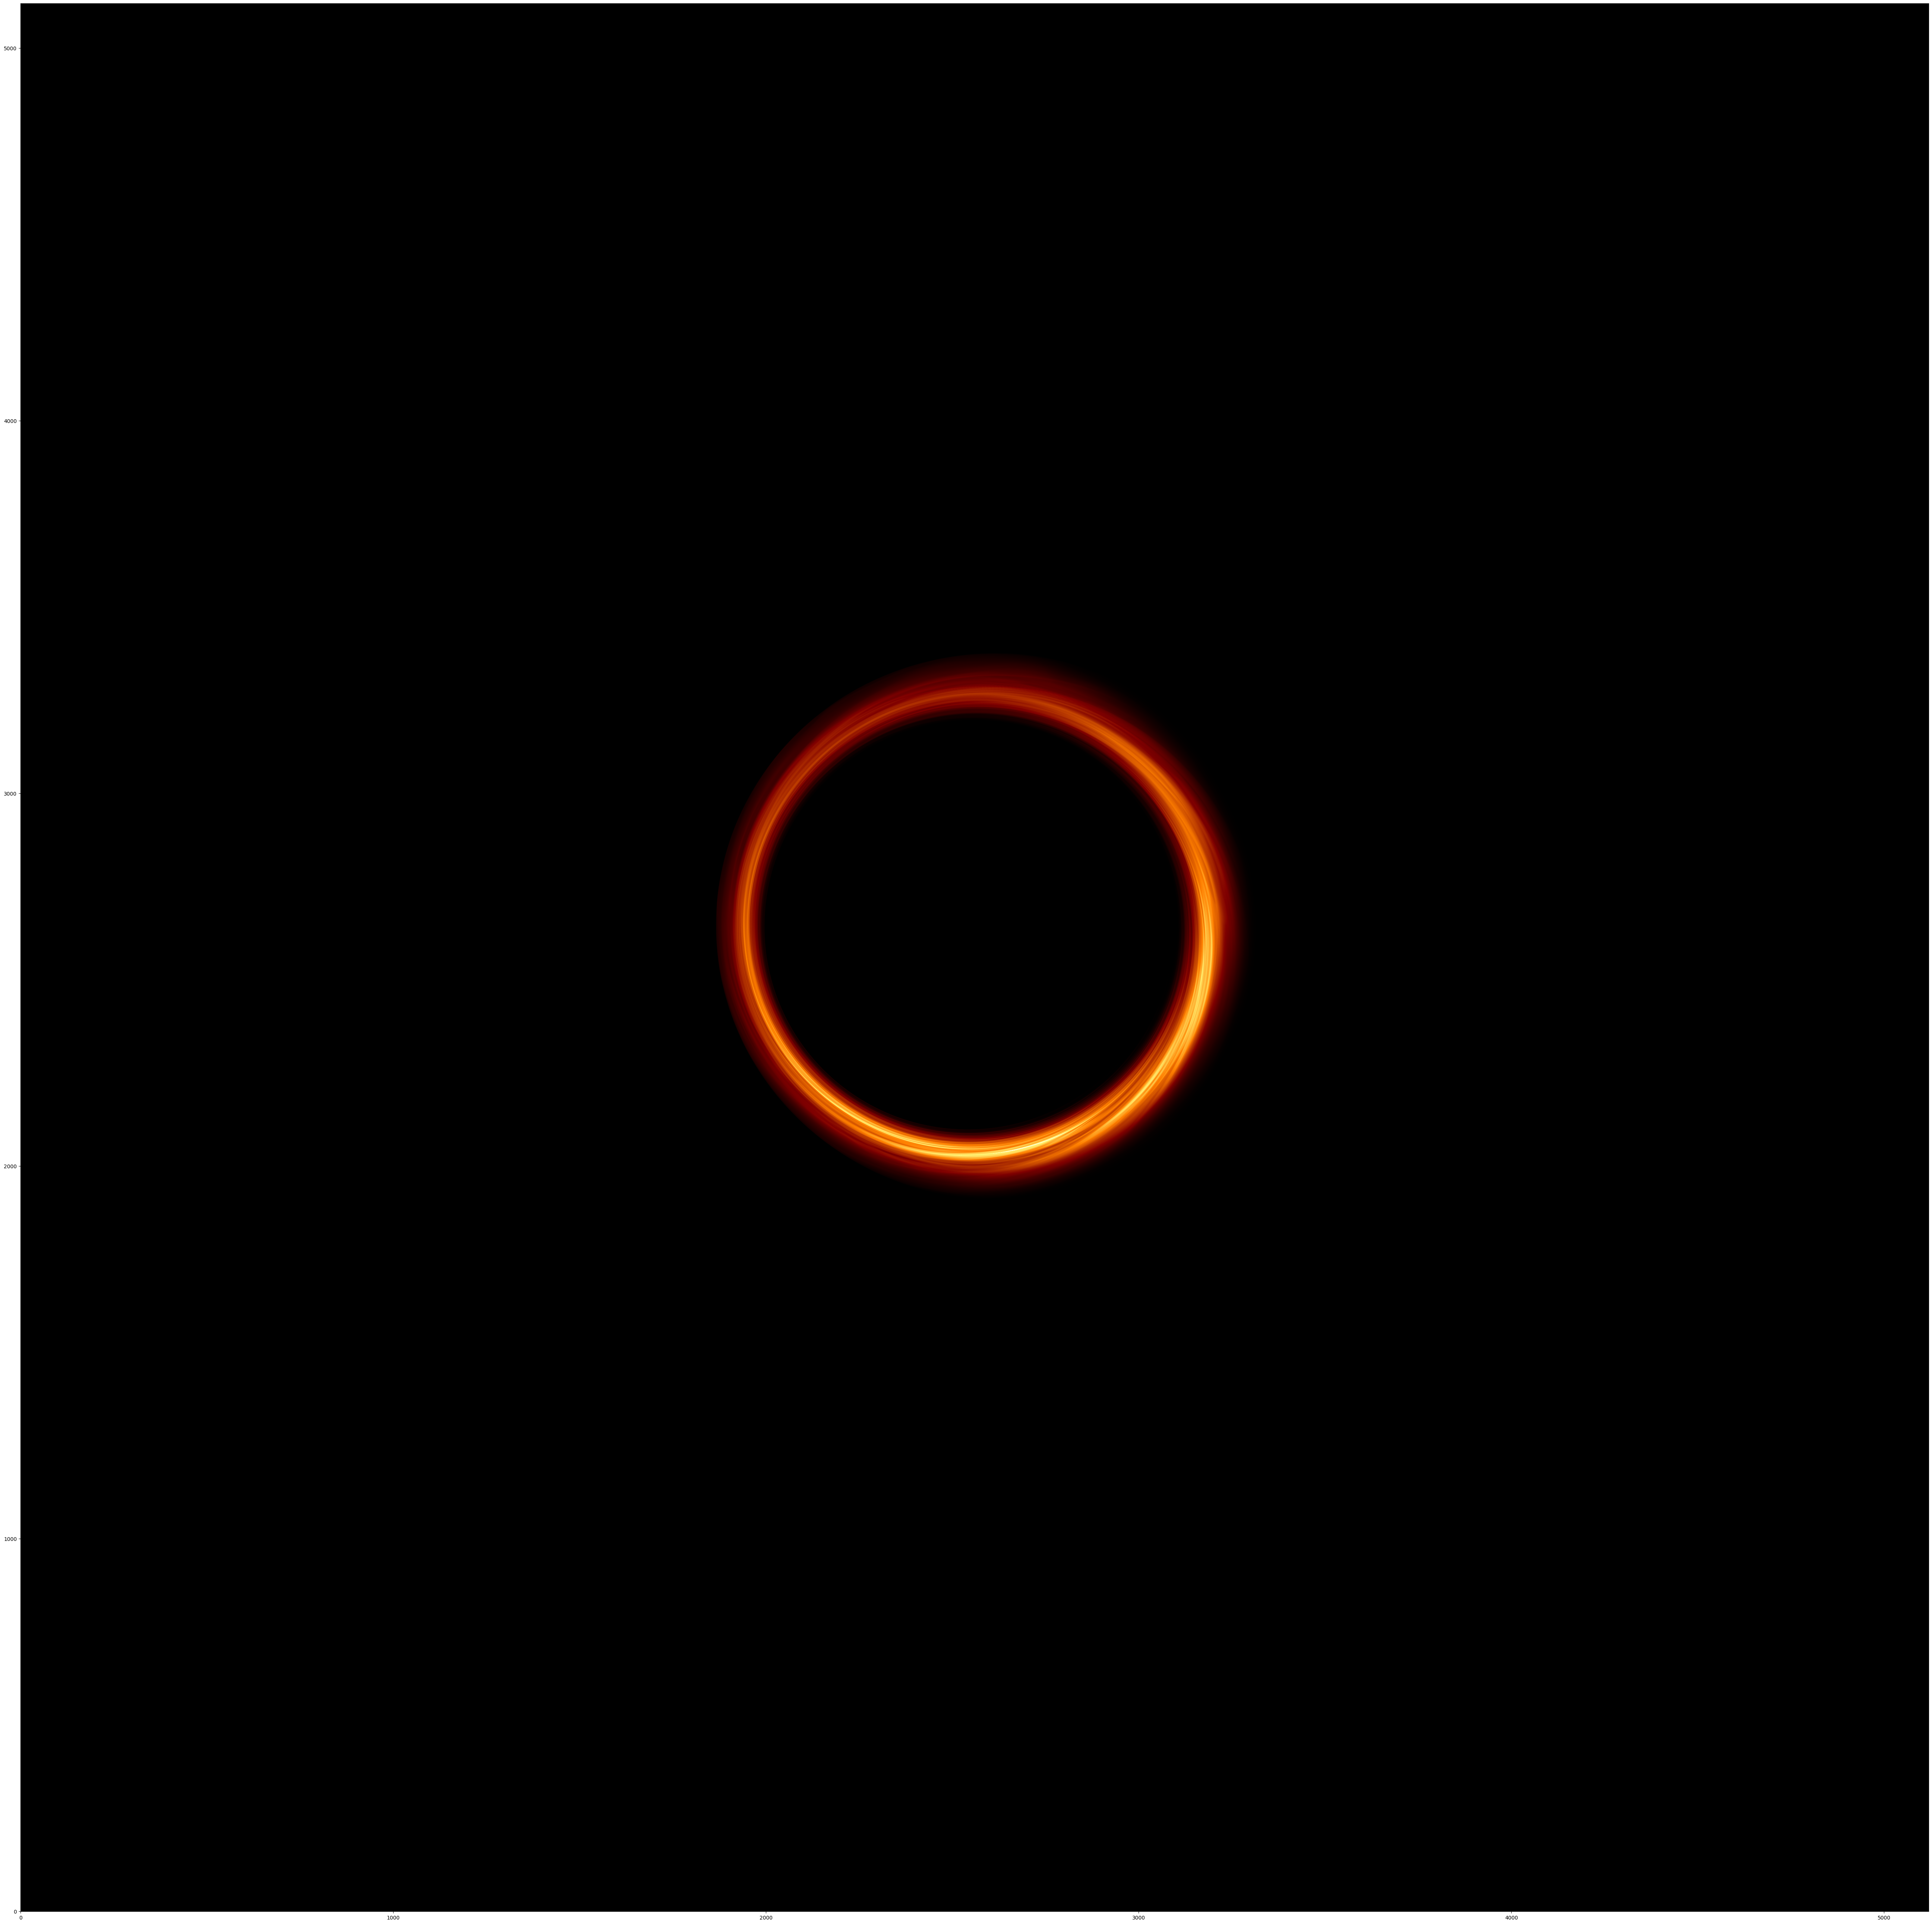

In [7]:
imdata = load_several(['data/dump_00005712_res40960_n001_3.npy', 
                       'data/dump_00008496_res40960_n001_3.npy',
                       'data/dump_00003856_res40960_n001_3.npy',
                       'data/dump_00010352_res40960_n001_3.npy'
                       ])

fig = plt.figure(figsize=(51.2, 51.2), facecolor='w')

ax1 = plt.subplot(1, 1, 1)

pdata = np.power(imdata, 0.8) * 5.
pdata += np.power(imdata, 0.32) * 12.
pdata += np.power(imdata, 3) * 20
vmax = np.max(pdata) / np.sqrt(1.1)

xlocs = np.arange(pdata.shape[0]) - pdata.shape[0] // 2 - 100
ylocs = np.arange(pdata.shape[1]) - pdata.shape[1] // 2
xlocs, ylocs = np.meshgrid(xlocs, ylocs, indexing='ij')

rlocs = np.sqrt(xlocs**2. + ylocs**2.)

r0 = (550+720)/2.
sig = 70.
pdata_blurred = np.copy(pdata)
pdata_blurred = pdata_blurred * np.exp( -(rlocs - r0)**2./sig/sig )

ax1.imshow(pdata_blurred[:, ::-1], origin='lower', cmap='afmhot_u', vmin=0, vmax=vmax)
#ax1.contour(rlocs, colors='w', levels=[550, 720])
ax1.set_position([0, 0, 1, 1])

plt.savefig('im_n001.png', dpi=100)

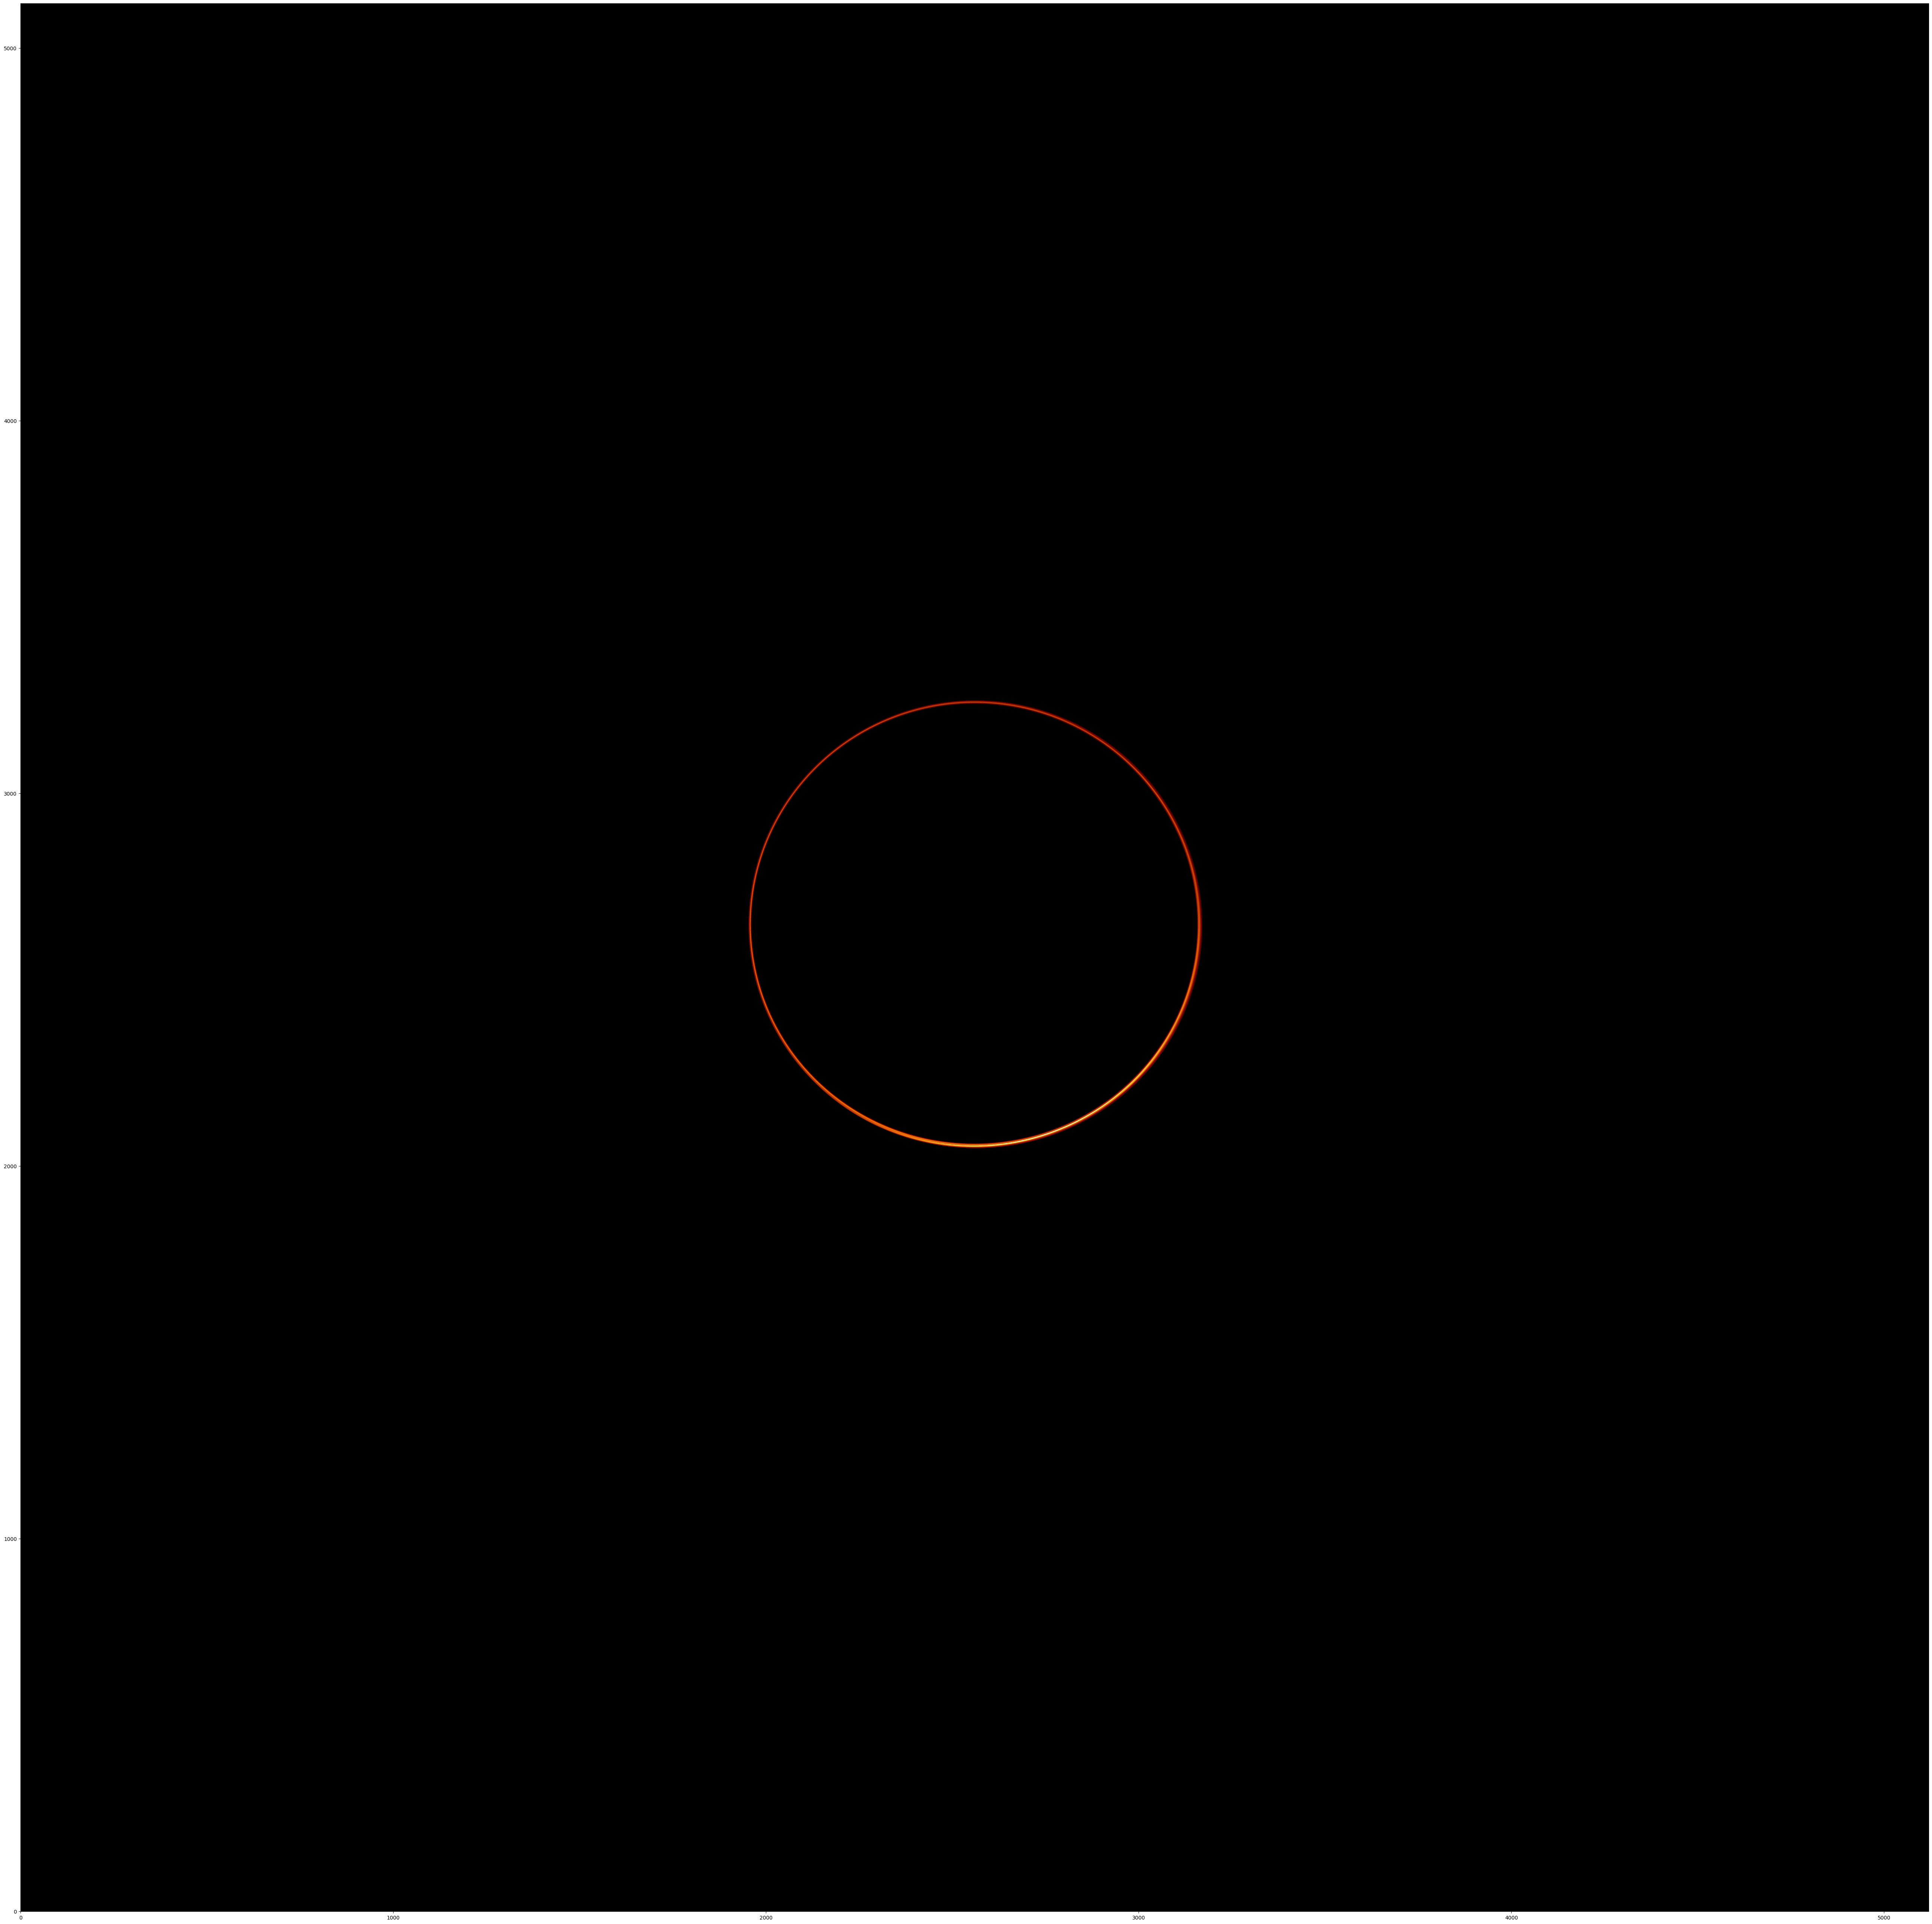

In [8]:
imdata = load_several(['data/dump_00005712_res40960_n002_3.npy', 
                       'data/dump_00008496_res40960_n002_3.npy',
                       'data/dump_00003856_res40960_n002_3.npy',
                       'data/dump_00010352_res40960_n002_3.npy'
                       ])

fig = plt.figure(figsize=(51.2, 51.2), facecolor='w')

ax1 = plt.subplot(1, 1, 1)

pdata = np.power(imdata, 0.8) * 5.
pdata += np.power(imdata, 0.32) * 12.
pdata += np.power(imdata, 3) * 20
vmax = np.max(pdata) / np.sqrt(1.1)

ax1.imshow(pdata[:, ::-1], origin='lower', cmap='afmhot_u', vmin=0, vmax=vmax)
ax1.set_position([0, 0, 1, 1])

plt.savefig('im_n002.png', dpi=100)